#Imports


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

#Funciones

In [34]:
def esChona(disp): #Esta funcion devuelve una lista con todos los dispositivos que son de Chona
  return disp not in ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick', 'TRAILER', 'HOOK', 'RECAP', 'TEASER_TRAILER']

In [33]:
def filterMovies(title): #Esta funcion devuelve el tipo de titulo que se esta reproduciendo
  if len(title.split(":")) <= 2:
    return "Movie"
  else:
    return "Series"

In [32]:
def maxList(myList):
  max = 0
  for i in myList:
    if max < myList[i]: 
      max = myList[i]
      maxDisp = i
  return maxDisp

In [31]:
def transformTime(myStr): #Esta funcion sirve para transformar el tiempo del formato "00:00:00" a segundos
  totalTime = 0
  if int(myStr[0]) > 0:
    totalTime += (myStr[0] * 10 * 60 * 60)
  if int(myStr[1]) > 0:
    totalTime += (int(myStr[1]) * 60 * 60)
  if int(myStr[3]) > 0:
    totalTime += (int(myStr[3]) * 10 * 60)
  if int(myStr[4]) > 0:
    totalTime += (int(myStr[4]) * 60)
  if int(myStr[6]) > 0:
    totalTime += (int(myStr[6]) * 10)
  if int(myStr[7]) > 0:
    totalTime += int(myStr[7])
  return totalTime

In [50]:
def getAnio(anio): #Funcion para obtener el año
  anioFinal = 0
  anioFinal += int(anio[0]) * 1000
  anioFinal += int(anio[1]) * 100
  anioFinal += int(anio[2]) * 10
  anioFinal += int(anio[3])
  return int(anioFinal)

#Ejercicios

In [ ]:
#Esto es para poder leer el archivo en los ejercicios

In [35]:
dfBasic = pd.read_csv("NetflixHistory.csv")

(filter)

In [36]:
df = dfBasic[dfBasic["Device Type"].apply(esChona)] #Esto filtra los dispositivos
dfFinal = df[df["Supplemental Video Type"].apply(esChona)] #esto filtra los trailers

##a)

In [ ]:
#Consigna: Contabilizar el dispositivo con el que más títulos se reprodujeron.

In [37]:
devList = {} #Creo una lista vacia
for i, row in dfFinal.iterrows(): #Recorro la lista
  device = row["Device Type"]
  if device in devList: #Pregunto si el dispositivo esta en la lista
    devList[device] += 1 #Sumo uno si esta
  else:
    devList[device] = 1
maxList(devList) #Muestro la lista

'Apple Apple TV 4 Apple TV'

##b)

In [ ]:
#Consigna: Encontrar la película con más ocurrencias y la película con mayor duración total.

In [38]:
dfFinal["Type"] = dfFinal["Title"].apply(filterMovies) # Aca agregamos el tipo al dataframe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
viewsList = {} #Creo una lista vacia
dfMovies = dfFinal[dfFinal["Type"] == "Movie"] #Filtro las peliculas
for i, row in dfMovies.iterrows(): #Recorro las peliculas
  views = row["Title"]
  if views in viewsList: #Pregunto si la pelicula esta en la lista
    viewsList[views] += 1 #Si es asi le sumo uno
  else:
    viewsList[views] = 1
maxList(viewsList) #Muestro la lista

'Star Wars: El Imperio contraataca'

In [ ]:
#Consigna: B ii:

In [42]:
dfNuevo = dfMovies.groupby(["Title"]).sum() #Agrupo por los titulos de las pelis
seconds = dfMovies["Duration"].apply(transformTime) #Transformo la duracion en segundos
dfMovies["Seconds"] = seconds #Creo la columna seconds
dfNuevo["Seconds"].idxmax() #Saco el titulo con mas segundos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


'Star Wars: El Imperio contraataca'

##c) 

In [ ]:
#Consigna: Generar un TOP “N” de series vistas y graficar.

i)

In [ ]:
#Consigna: Por tiempo visto

In [43]:
dfSeries = dfFinal[dfFinal["Type"] == "Series"] #Filtrar por series
seconds = dfSeries["Duration"].apply(transformTime) #Transforma a segundos
dfSeries["Seconds"] = seconds #Crea la columna segundos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
df = dfSeries.groupby(["Title"]).sum() #Agrupa las series
dfTop = df["Seconds"].nlargest(3) #Filtra por la mayor duracion y devuelve los primero 3
dfTop #Muestra el top

Title
La ley de los audaces: Temporada 1: Piloto (Partes 1 y 2) (Capítulo 1)    19496
Community: Temporada 6: Espionaje moderno (Capítulo 11)                   16836
Doctor Who: Temporada 4: Las aguas de Marte (Capítulo 17)                 11076
Name: Seconds, dtype: int64

In [45]:
series = dfTop.index #Obtiene cada serie del top

Text(0, 0.5, 'Duracion')

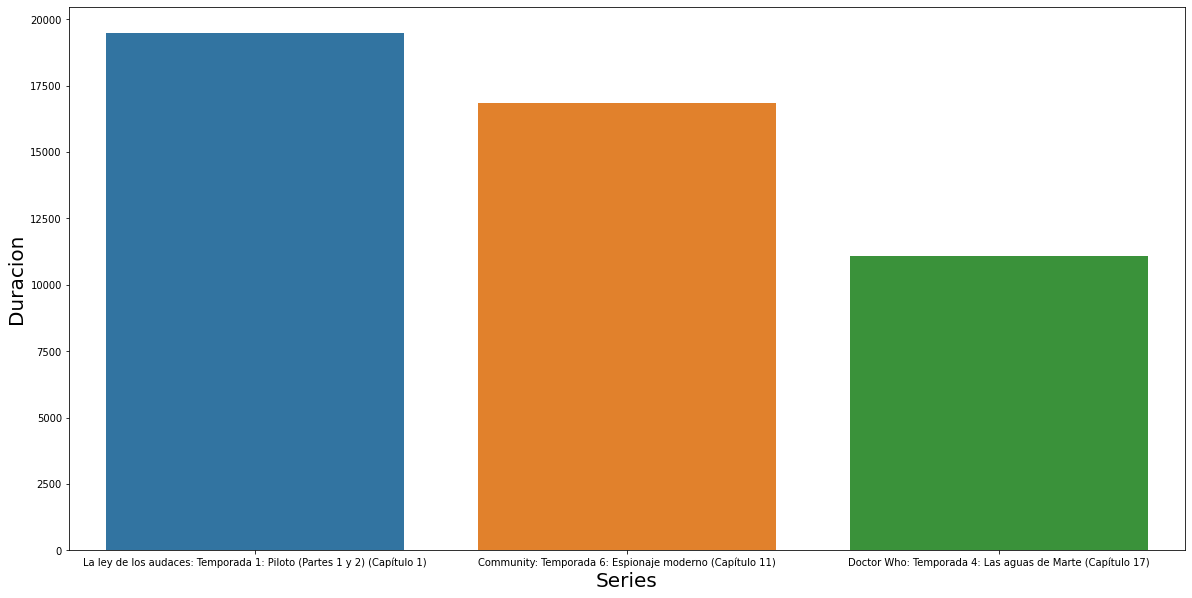

In [46]:
plt.figure(figsize = (20,10)) #Define el fontSize
grafico = sns.barplot(x = series, y = dfTop) #Definimos mostrar las series en el eje x y las reproducciones en el y
plt.xlabel("Series", fontsize = 20) #Definimos el label de las series
plt.ylabel("Duracion", fontsize = 20) #Definimos el label de la duracion

ii)

In [ ]:
#Consigna: Por ocurrencias

In [18]:
num = int(input("Ingrese la cantidad de seris que se les muestren "))

dfSeries = dfFinal[dfFinal["Type"] == "Series"] #Filtra por serie
viewsList = {} #Crea una lista vacia

for i, row in dfSeries.iterrows(): #Recorre la lista
  views = row["Title"]
  if views in viewsList: #Pregunta si la serie se esta en la lista
    viewsList[views] += 1 #Si esta le suma uno
  else:
    viewsList[views] = 1
k = Counter(viewsList) #Muestro la lista
k.most_common(num)

k=dict(k) #Convertimos a k en un mapa de claves y valores
key=list(k.keys()) #Convertimos los keys en una lista
value=list(k.values()) #Convertimos los values en una lista

Ingrese la cantidad de seris que se les muestren 5


Text(0, 0.5, 'Duracion')

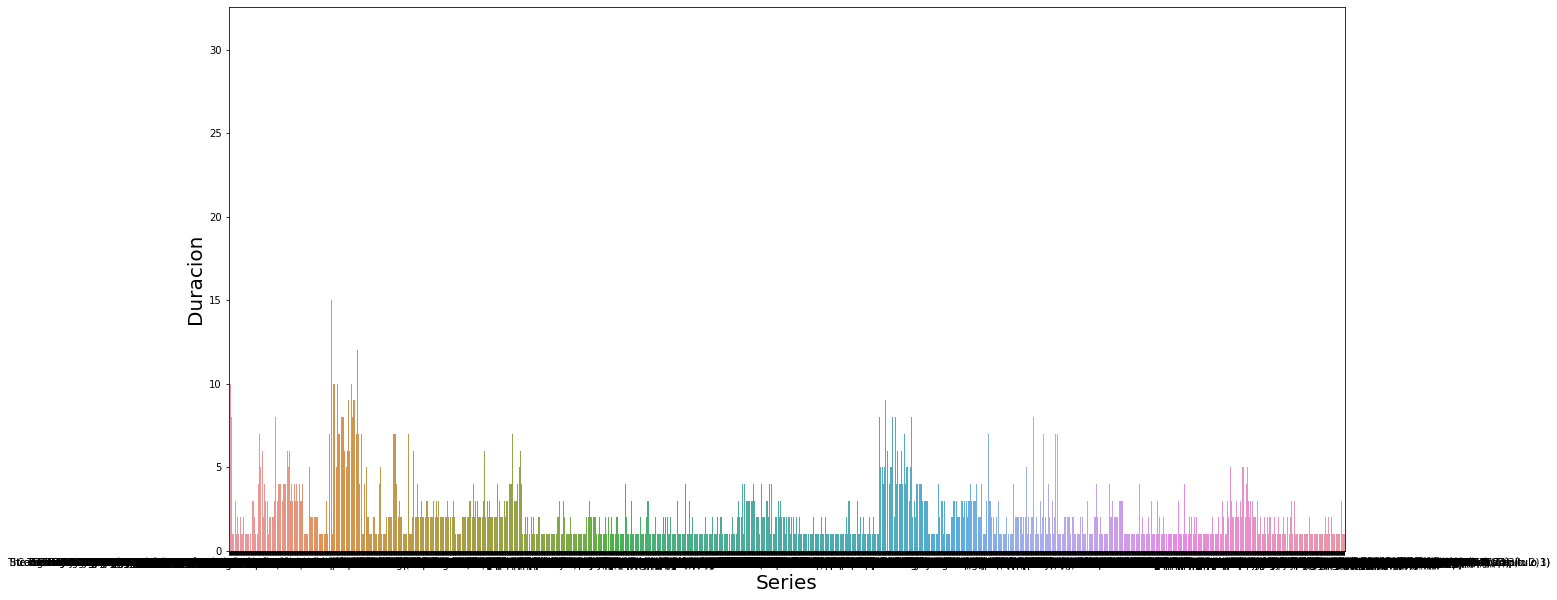

In [19]:
plt.figure(figsize = (20,10)) #Definimos el fontSize
grafico = sns.barplot(x = key, y = value) #Definimos los values en el eje x y en el eje y
plt.xlabel("Series", fontsize = 20) #Creamos un label de series
plt.ylabel("Duracion", fontsize = 20) #Creamos un label de duracion

##d)

In [ ]:
#Consigna: Visualizar una semana de reproducciones genérica, 
#en función a las reproducciones por día y por horario de todos los años del repo.

In [47]:
reproducciones = [[day for day in range(24)] for week in range(7)] #Creamos una variable que almacena las horas de un dia y los dias de la semana

for dia in range(7): #Recorremos la semana para obtener los dias
  for hora in range(24): #Recorremos el dia para obtener las horas
    dfFinal['Start Time'] = pd.to_datetime(dfFinal['Start Time'], errors='coerce') #Convertimos el Start Time en datetime
    reproducciones[dia][hora] = sum(dfFinal[(dfFinal["Start Time"].dt.dayofweek == dia) & (dfFinal["Start Time"].dt.hour == hora)]["Title"].value_counts().to_list())
    #Por ultimo guardamos en la variable de los dias de la semana la suma de cada visualizacion por dia

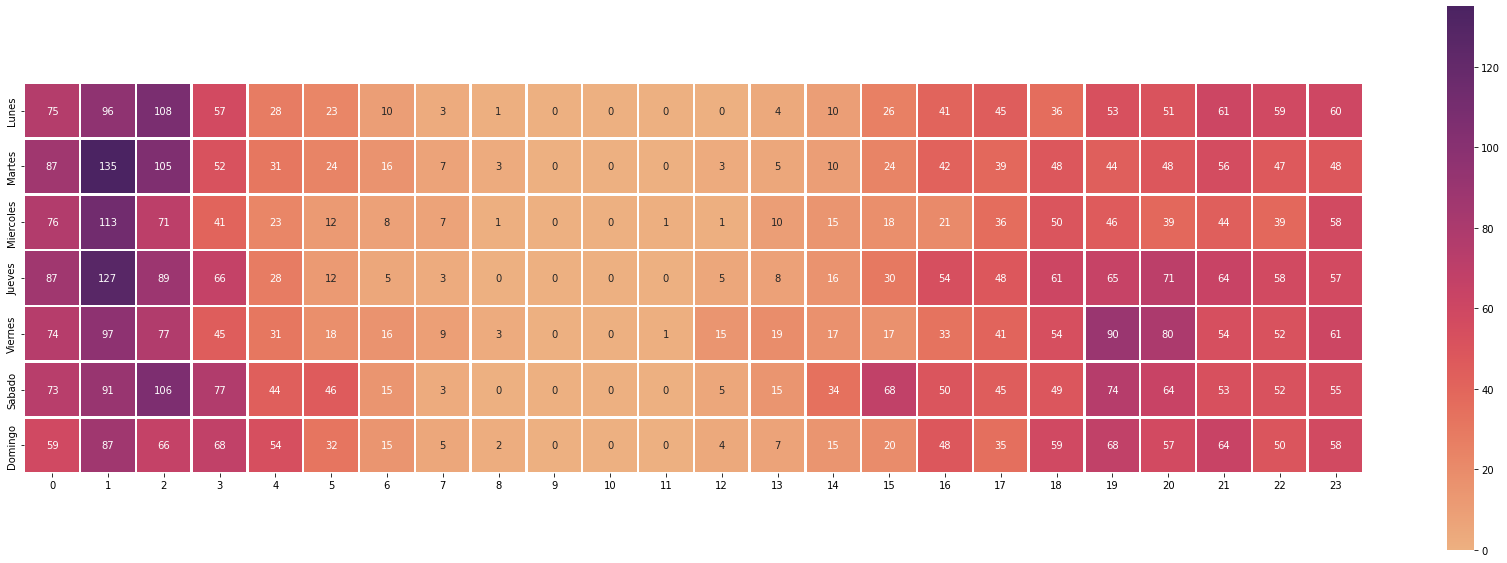

In [48]:
days = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"] #Creamos un array de los dias de la semana

plt.figure(figsize=(30,10)) #Declaramos el font size del grafico

sns.heatmap(reproducciones, annot= True, fmt = 'd', square = True, linewidths = 1.5, cbar = True, yticklabels = days, cmap = "flare") #Inicializamos un grafico tipo heatmap

##e) 

In [ ]:
#Consigna: Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

In [49]:
anio = dfFinal["Start Time"].apply(getAnio) #Aplicamos la funcion para obtener el año
dfFinal["Año"] = anio #Creamos la columna anio

TypeError: ignored

In [24]:
titlesSeenInYear = {} #Aca creamos un array con key del año y en el value los titulos vistos
titlesSeenInYear[2015] = len(dfFinal[dfFinal["Año"] == 2015].index)
titlesSeenInYear[2016] = len(dfFinal[dfFinal["Año"] == 2016].index)
titlesSeenInYear[2017] = len(dfFinal[dfFinal["Año"] == 2017].index)
titlesSeenInYear[2018] = len(dfFinal[dfFinal["Año"] == 2018].index)
titlesSeenInYear[2019] = len(dfFinal[dfFinal["Año"] == 2019].index)
titlesSeenInYear[2020] = len(dfFinal[dfFinal["Año"] == 2020].index)
titlesSeenInYear[2021] = len(dfFinal[dfFinal["Año"] == 2021].index)
titlesSeenInYear[2022] = len(dfFinal[dfFinal["Año"] == 2022].index)

KeyError: ignored

In [ ]:
keys = list(titlesSeenInYear.keys()) #Creamos una list de los keys
values = list(titlesSeenInYear.values()) #Creamos una lista de los values

Text(0, 0.5, 'TitlesSeen')

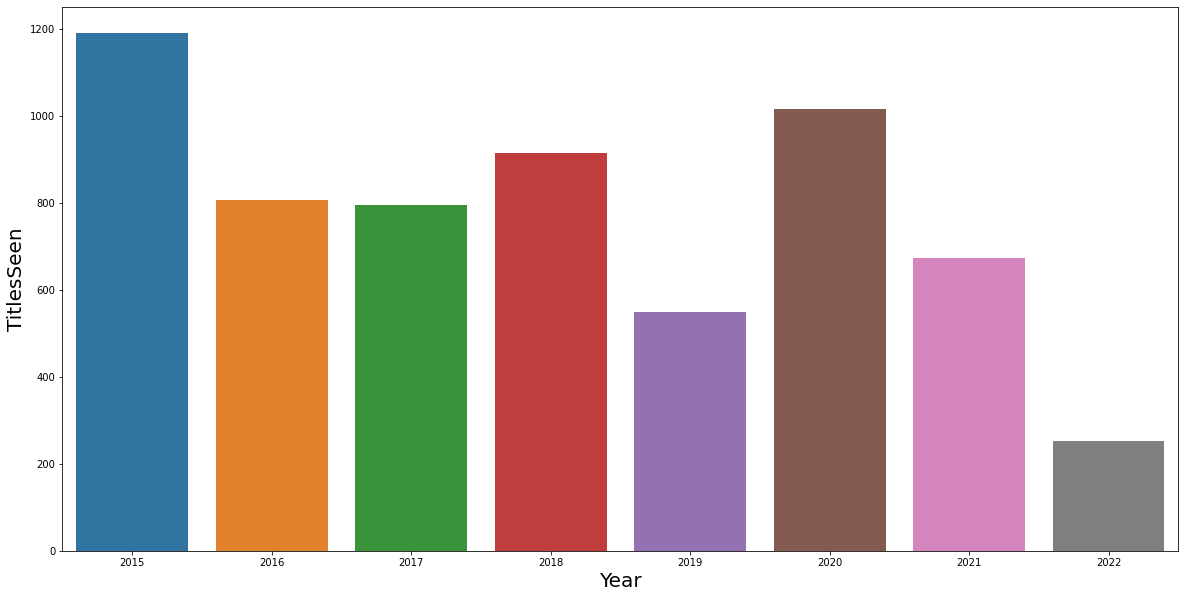

In [ ]:
plt.figure(figsize = (20,10)) #Definimos tamaños de size
grafico = sns.barplot(x = keys, y = values) #Agregamos las list de los keys y los values
plt.xlabel("Year", fontsize = 20) #Creamos label de los year
plt.ylabel("TitlesSeen", fontsize = 20) #Creamos label de los Titulos vistos

##f)

In [ ]:
##Consigna: Total de días de todos los títulos reproducidos.

In [28]:
seconds = dfFinal["Duration"].apply(transformTime) #Transforma a segundos
dfFinal["Seconds"] = seconds #Crea la columna segundos
segundos = dfFinal["Seconds"].sum() #Suma los segundos
dias = round(segundos / 86400) #Los divide por dias
dias #Muestra los dias

100